In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [4]:
admissions = pd.read_csv("Admission_Predict_Ver1.1.csv")
admissions = admissions.drop('Serial No.',axis = 1)

In [5]:
admissions.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
admissions.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


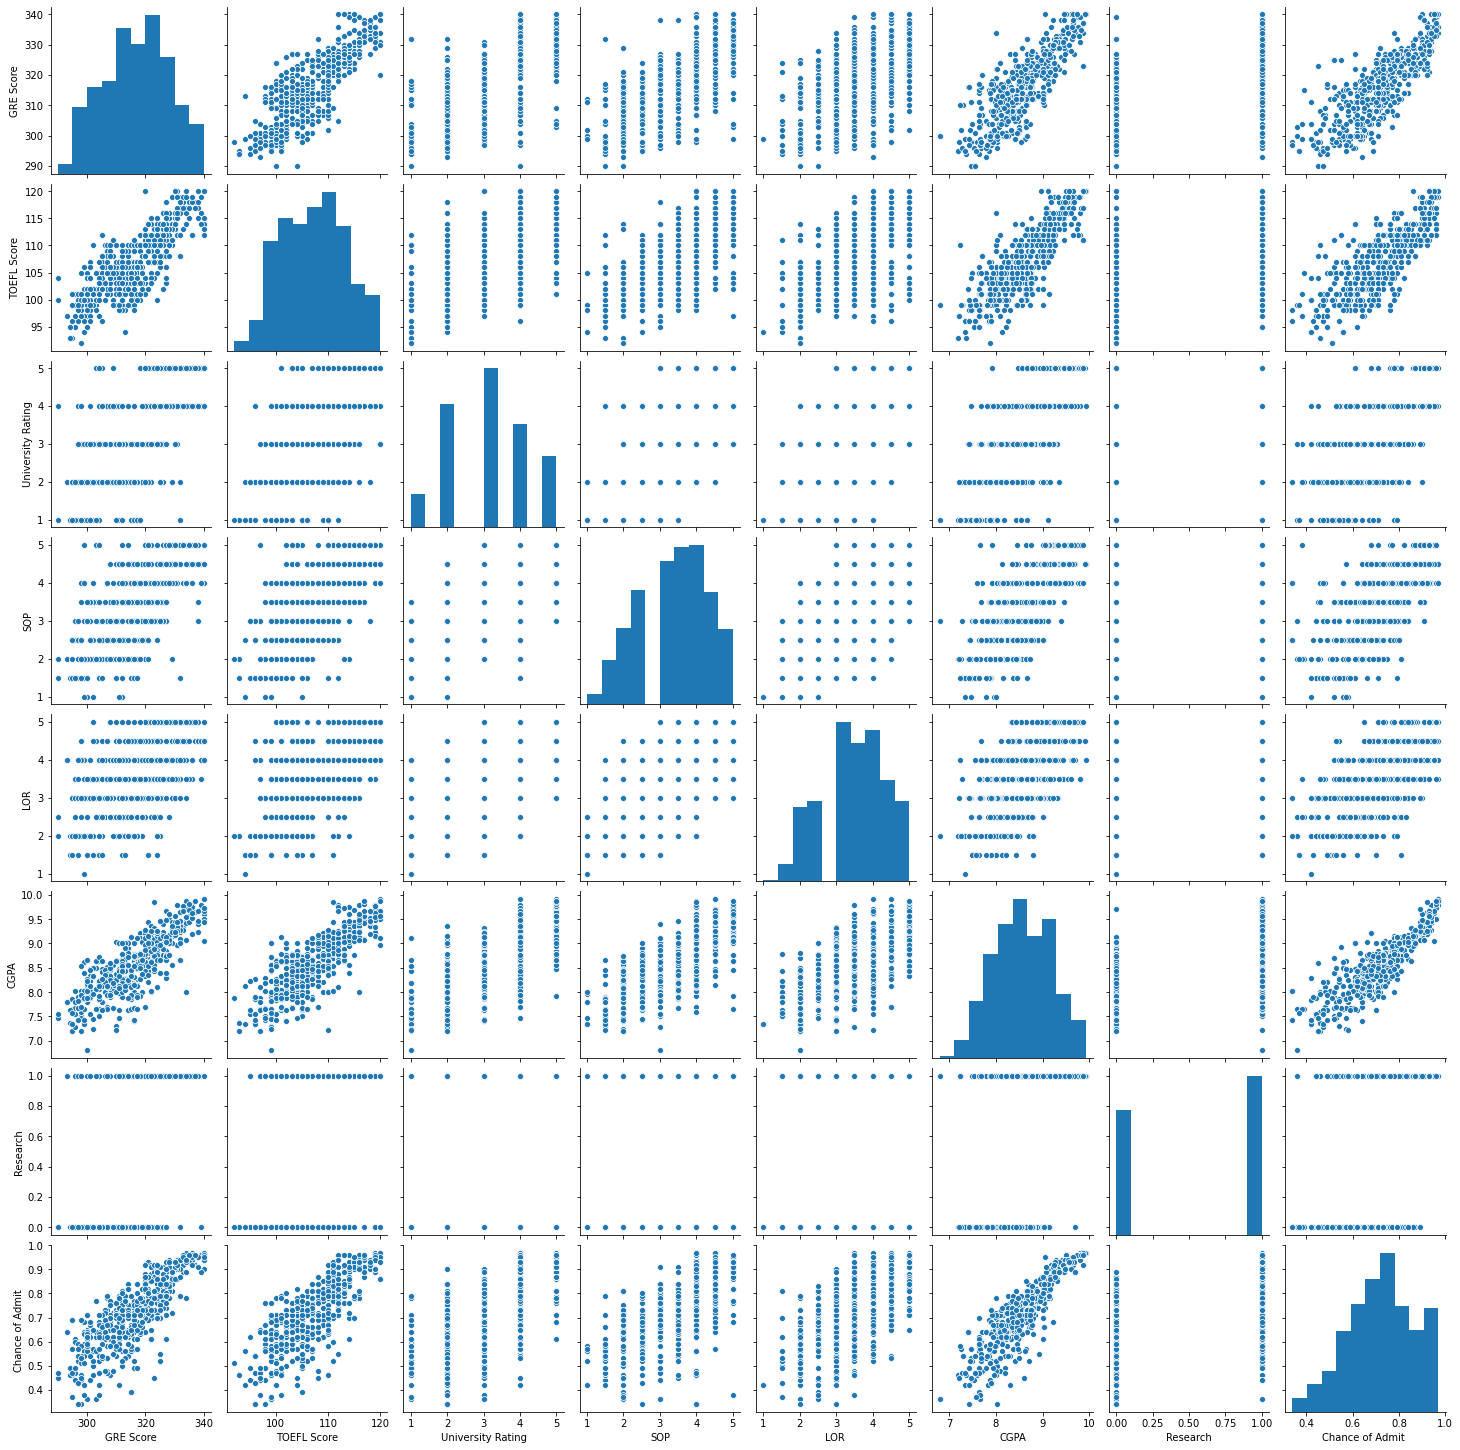

In [8]:
sns.pairplot(admissions)

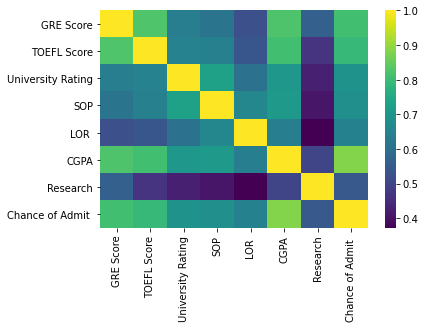

In [15]:
corr = admissions.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap='viridis')

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import mean_absolute_error

In [17]:
X = admissions.drop('Chance of Admit ',axis = 1)
y = admissions['Chance of Admit ']

In [18]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = .25,random_state = 123)

In [19]:
linear = LinearRegression()

In [20]:
linear.fit(X_train,y_train)

LinearRegression()

In [22]:
print('Mean absolute error for linear model: %0.4f' %mean_absolute_error(y_val,linear.predict(X_val)))

Mean absolute error for linear model: 0.0423


In [23]:
ranfor=RandomForestRegressor(n_estimators = 100,random_state = 42)

In [24]:
ranfor.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [25]:
print('Mean absolute error for random forest model: %0.4f' %mean_absolute_error(y_val,ranfor.predict(X_val)))

Mean absolute error for random forest model: 0.0419
